In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import uproot
import awkward as ak
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
signal = uproot.open('/Users/chawla19/Topbjets/Bdecays/Parameterization/ul2018.root:tree')
df1 = signal.arrays(("fLxy","fLxysig","fCt","fChi2","fMass_lepD","fMass"), library="pd")
df1 = df1.reset_index(level='subentry', drop=True)
df1 = df1.reset_index(level='entry', drop=True)
df1 = df1.reset_index(drop=True)
df1.head()

,fLxy,fLxysig,fCt,fChi2,fMass_lepD,fMass
0,0.894625,68.715301,0.105550,0.371413,3.508988,1.865707
1,0.087048,4.305304,0.012206,0.102639,2.498656,1.871394
2,2.602185,56.173694,0.066441,3.094246,3.868814,1.847630
3,0.187600,10.480328,0.018901,3.967425,3.952805,1.853929
4,0.507901,16.896989,0.017286,1.283057,3.648766,1.872674


In [3]:
data = uproot.open('/Users/chawla19/Topbjets/Bdecays/Parameterization/data2018.root:tree')
df2 = data.arrays(("fLxy","fLxysig","fCt","fChi2","fMass_lepD","fMass"), library="pd")
df2 = df2.reset_index(level='subentry', drop=True)
df2 = df2.reset_index(level='entry', drop=True)
df2 = df2.reset_index(drop=True)
df2.head()

,fLxy,fLxysig,fCt,fChi2,fMass_lepD,fMass
0,0.129671,6.558020,0.030979,769.006757,3.401606,1.784360
1,-0.175531,-5.860181,-0.018892,2.977394,2.403696,1.731940
2,0.008120,0.203882,0.000488,3.466679,2.168316,1.751959
3,0.137405,6.973473,0.032456,787.129530,3.468655,1.815586
4,0.198764,2.020785,0.023120,2.549086,2.164750,1.722707


In [4]:
len(df1.index)

57759

In [5]:
len(df2.index)

468231

In [6]:
df1 = df1.loc[(df1['fChi2'] < 100) & (df1['fMass'] >= 1.8) & (df1['fMass'] <= 1.9)]
df2 = df2.loc[(df2['fChi2'] < 100) & (df2['fMass'] < 1.8) | (df2['fMass'] > 1.9)]

In [7]:
df1.head()

,fLxy,fLxysig,fCt,fChi2,fMass_lepD,fMass
0,0.894625,68.715301,0.105550,0.371413,3.508988,1.865707
1,0.087048,4.305304,0.012206,0.102639,2.498656,1.871394
2,2.602185,56.173694,0.066441,3.094246,3.868814,1.847630
3,0.187600,10.480328,0.018901,3.967425,3.952805,1.853929
4,0.507901,16.896989,0.017286,1.283057,3.648766,1.872674


In [8]:
df2.head()

,fLxy,fLxysig,fCt,fChi2,fMass_lepD,fMass
1,-0.175531,-5.860181,-0.018892,2.977394,2.403696,1.731940
2,0.008120,0.203882,0.000488,3.466679,2.168316,1.751959
4,0.198764,2.020785,0.023120,2.549086,2.164750,1.722707
5,0.101003,5.728943,0.016740,9.170443,3.210758,1.764457
6,-1.084925,-43.731750,-0.139656,629.030565,4.471849,1.929263


In [9]:
len(df1.index)

50952

In [10]:
len(df2.index)

275117

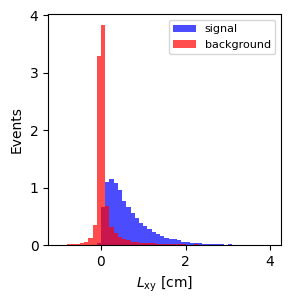

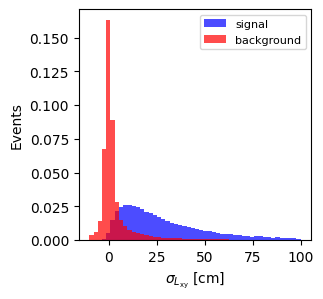

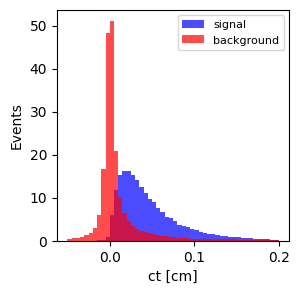

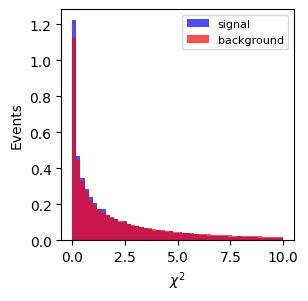

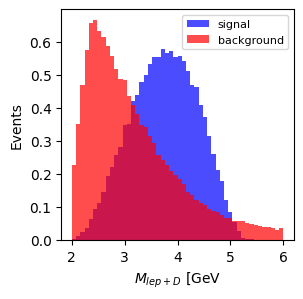

In [11]:
cols = ["fLxy","fLxysig","fCt","fChi2","fMass_lepD"]
xrange = [(-1,4),(-10,100),(-0.05,0.2),(0,10),(2,6)]
xaxis = ['$L_{\mathrm{xy}}$ [cm]','$\sigma_{L_{\mathrm{xy}}}$ [cm]','ct [cm]','$\chi^{2}$','$M_{lep+D}$ [GeV']
for label,i,j in zip(cols[:],xrange[:],xaxis[:]):
    plt.figure(figsize=(3,3))
    plt.hist(df1[label], bins=50, color='blue', range=i, label='signal', alpha=0.7, density=True)
    plt.hist(df2[label], bins=50, color='red', range=i, label='background', alpha=0.7, density=True)
    plt.ylabel("Events")
    plt.xlabel(j)
    plt.legend(fontsize=8)
    plt.show(block=False)
    plt.close('all')

In [16]:
df = pd.concat([df1,df2],ignore_index=True)
output1 = np.ones(len(df1.values))
output2 = np.zeros(len(df2.values))
label = np.concatenate([output1,output2])
fMass18 = df['fMass'].tolist()
df['class'] = label
df['class'] = df['class'].astype(int)
df = df.drop('fChi2', axis=1)
df = df.drop('fMass_lepD', axis=1)
#df = df.drop('fMass', axis=1)
df.head()

,fLxy,fLxysig,fCt,fMass,class
0,0.894625,68.715301,0.105550,1.865707,1
1,0.087048,4.305304,0.012206,1.871394,1
2,2.602185,56.173694,0.066441,1.847630,1
3,0.187600,10.480328,0.018901,1.853929,1
4,0.507901,16.896989,0.017286,1.872674,1


In [17]:
len(df)

326069

# Scaler

In [110]:
scaler = StandardScaler()
df_scaled = df.drop('class', axis=1)
df_scaled = scaler.fit_transform(df_scaled.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=['fLxy','fLxysig','fCt'])
#df_scaled = (df_scaled-df_scaled.mean())/df_scaled.std()
#df_scaled['fMass'] = fMass18
df_scaled['class'] = label
df_scaled['class'] = df_scaled['class'].astype(int)
df_scaled.head()

,fLxy,fLxysig,fCt,fMass,class
0,0.174814,0.734649,0.121109,1.865707,1
1,-0.012660,-0.061620,0.006967,1.871394,1
2,0.571215,0.579603,0.073286,1.847630,1
3,0.010683,0.014719,0.015153,1.853929,1
4,0.085039,0.094045,0.013179,1.872674,1


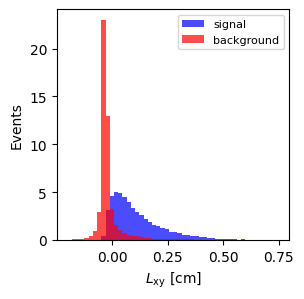

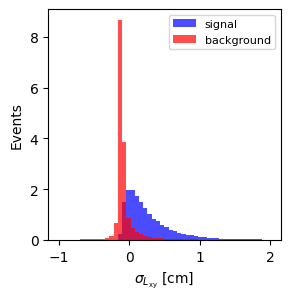

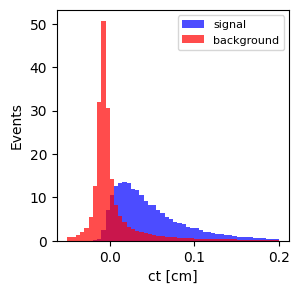

In [111]:
cols = ["fLxy","fLxysig","fCt"]
xrange = [(-0.2,0.75),(-1,2),(-0.05,0.2)]
xaxis = ['$L_{\mathrm{xy}}$ [cm]','$\sigma_{L_{\mathrm{xy}}}$ [cm]','ct [cm]']
for c,i,j in zip(cols[:],xrange[:],xaxis[:]):
    plt.figure(figsize=(3,3))
    plt.hist(df_scaled[df_scaled["class"]==1][c], bins=50, color='blue', range=i, label='signal', alpha=0.7, density=True)
    plt.hist(df_scaled[df_scaled["class"]==0][c], bins=50, color='red', range=i, label='background', alpha=0.7, density=True)
    plt.ylabel("Events")
    plt.xlabel(j)
    plt.legend(fontsize=8)
    plt.show()

In [112]:
df = df_scaled
df.head()

,fLxy,fLxysig,fCt,fMass,class
0,0.174814,0.734649,0.121109,1.865707,1
1,-0.012660,-0.061620,0.006967,1.871394,1
2,0.571215,0.579603,0.073286,1.847630,1
3,0.010683,0.014719,0.015153,1.853929,1
4,0.085039,0.094045,0.013179,1.872674,1


# Train, validation, tests datasets

In [18]:
df = df.sample(frac=1)
df.head()

,fLxy,fLxysig,fCt,fMass,class
65802,0.014655,0.907660,0.002197,1.932817,0
257630,-0.053329,-1.718979,-0.007031,1.714229,0
299809,0.056799,2.856669,0.007593,1.982494,0
7685,0.645502,30.494727,0.079935,1.869532,1
148065,0.000532,0.027627,0.000036,1.793058,0


In [19]:
train, valid, test = np.split(df, [int(0.6*len(df)), int(0.8*len(df))])

In [20]:
print(len(train))
print(len(valid))
print(len(test))

195641
65214
65214


In [21]:
def scale_dataset(dataframe, scale=False, oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values
    
    if(scale):
        scaler = StandardScaler()
        X = scaler.fit_transform(X)
    
    
    if(oversample):
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)
    
    data = np.hstack((X, np.reshape(y, (-1, 1))))
    
    return data, X, y

In [22]:
train_, X_train_, y_train = scale_dataset(train, scale=False, oversample=False)
valid_, X_valid_, y_valid = scale_dataset(valid, scale=False, oversample=False)
test_, X_test_, y_test = scale_dataset(test, scale=False, oversample=False)

In [23]:
print(len(train[train['class']==1]))
print(len(train[train['class']==0]))

30478
165163


In [25]:
X_train = X_train_[:,:-1]
X_valid = X_valid_[:,:-1]
X_test = X_test_[:,:-1]

In [26]:
X_train

array([[ 1.46549065e-02,  9.07659721e-01,  2.19676184e-03],
       [-5.33293529e-02, -1.71897926e+00, -7.03135334e-03],
       [ 5.67990930e-02,  2.85666853e+00,  7.59299238e-03],
       ...,
       [ 2.55309290e-01,  5.57073024e+00,  1.31165951e-02],
       [ 6.70004775e-02,  2.59696648e+00,  4.28448802e-03],
       [ 1.02960004e+00,  6.69474073e+01,  7.16608082e-02]])

In [27]:
y_train

array([0, 0, 0, ..., 0, 1, 1])

In [28]:
print(len(y_train))
print(sum(y_train==1))
print(sum(y_train==0))

195641
30478
165163


# K neighbors classifier

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [27]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model = knn_model.fit(X_train, y_train)

In [28]:
y_pred = knn_model.predict(X_test)

In [29]:
y_pred

array([1, 1, 1, ..., 1, 0, 0])

In [30]:
y_test

array([0, 1, 1, ..., 0, 0, 0])

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93     55010
           1       0.65      0.63      0.64     10204

    accuracy                           0.89     65214
   macro avg       0.79      0.78      0.79     65214
weighted avg       0.89      0.89      0.89     65214



# Naive Bayes

In [32]:
from sklearn.naive_bayes import GaussianNB

In [33]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [34]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.09      0.17     55010
           1       0.16      0.96      0.28     10204

    accuracy                           0.23     65214
   macro avg       0.54      0.52      0.22     65214
weighted avg       0.80      0.23      0.19     65214



# Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train) 

In [37]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92     55010
           1       0.56      0.64      0.60     10204

    accuracy                           0.86     65214
   macro avg       0.74      0.77      0.76     65214
weighted avg       0.87      0.86      0.87     65214



In [38]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [ ]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

# Neural Net

In [30]:
import tensorflow as tf
from sklearn import metrics

In [31]:
def plot_history(history, ss, bs, fpr, tpr):
    fig, ax = plt.subplots(2,2 , figsize=(8,6))
        
    ax[0,0].plot(history.history['loss'], label='loss')
    ax[0,0].plot(history.history['val_loss'], label='val_loss')
    ax[0,0].set_xlabel('Epoch')
    ax[0,0].set_ylabel('Binary crossentropy')
    ax[0,0].grid(True)
    ax[0,0].legend(fontsize=8)

    
    ax[0,1].plot(history.history['accuracy'], label='accuracy')
    ax[0,1].plot(history.history['val_accuracy'], label='val_accuracy')
    ax[0,1].set_xlabel('Epoch')
    ax[0,1].set_ylabel('Accuracy')
    ax[0,1].grid(True)
    ax[0,1].legend(fontsize=8)
    
    bins = np.linspace(0,1,15)
    ax[1,0].hist(ss, bins, alpha=0.3, label='signal')
    ax[1,0].hist(bs, bins, alpha=0.3, label='background')    
    ax[1,0].set_yscale('log')
    #ax[1,0].set_ylim(1,1e-5)
    ax[1,0].set_xlabel('DNN score')
    ax[1,0].set_ylabel('Events')
    ax[1,0].grid(True)
    ax[1,0].legend(fontsize=8)
    
    ax[1,1].plot(fpr, tpr)
    ax[1,1].set_xlabel('FPR')
    ax[1,1].set_ylabel('TPR')
    ax[1,1].grid(True)    
    
    plt.show()

In [32]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(3,)),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                metrics=['accuracy'])
    history = nn_model.fit(
        X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
    )
    return nn_model, history

In [34]:
num_nodes=64
dropout_prob=0.3
lr=0.0001
epochs=50
batch_size=128
print(f"{epochs} epochs, nodes {num_nodes}, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
val_loss = model.evaluate(X_valid, y_valid)[0]
print(f"validation loss {val_loss}")

50 epochs, nodes 64, dropout 0.3, lr 0.0001, batch size 128
2038/2038 [==============================] - 1s 724us/step - loss: 0.1986 - accuracy: 0.9140
validation loss 0.19857658445835114


In [35]:
y_pred = model.predict(X_test)
y_pred = y_pred.ravel()
y_pred = np.round(y_pred, 4)
print(np.count_nonzero(y_test), (len(y_test)-np.count_nonzero(y_test)))

2038/2038 [==============================] - 2s 589us/step
10227 54987


In [36]:
a = np.delete(test_, [3], axis=1)
l = test_[:,-1]
X_signal = a[:, :-1][l==1]
X_background = a[:, :-1][l==0]
sig_scores = model.predict(X_signal)
bkg_scores = model.predict(X_background)

1719/1719 [==============================] - 1s 565us/step


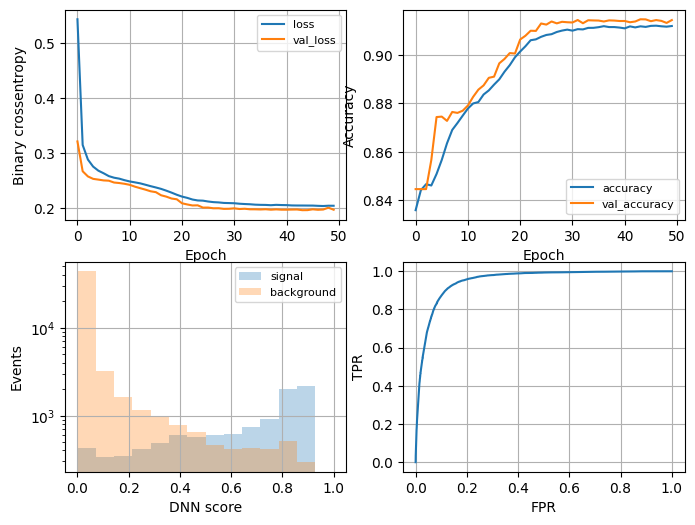

auc=0.9507


In [37]:
np.set_printoptions(suppress=True, precision=8)
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred, pos_label=1, drop_intermediate=False)
threshold = np.round(threshold, 4)
plot_history(history, sig_scores, bkg_scores, fpr, tpr)
roc_auc = metrics.auc(fpr, tpr)
print(f"auc={roc_auc:.4f}")

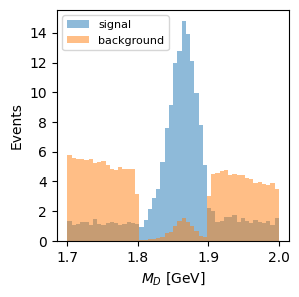

In [38]:
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)
y2d_pred = y_pred.reshape(-1,1)
plot = np.append(test_, y2d_pred, axis=1)
df_test = pd.DataFrame(plot)
df_test.columns = ["fLxy", "fLxysig", "fCt", "fMass", "class", "pred"]
plt.figure(figsize=(3,3))
plt.hist(df_test[df_test["pred"]==1]["fMass"], bins=50, range=(1.7,2.0), label='signal', alpha=0.5, density=True)
plt.hist(df_test[df_test["pred"]==0]["fMass"], bins=50, range=(1.7,2.0), label='background', alpha=0.5, density=True)
plt.ylabel("Events")
plt.xlabel("$M_{D}$ [GeV]")
plt.legend(fontsize=8)
plt.show()

# Neural Net on 2017 data

In [39]:
data2017 = uproot.open('/Users/chawla19/Topbjets/Bdecays/Parameterization/data2017.root:tree')
df3 = data2017.arrays(("fLxy","fLxysig","fCt","fChi2","fMass_lepD","fMass"), library="pd")
df3 = df3.reset_index(level='subentry', drop=True)
df3 = df3.reset_index(level='entry', drop=True)
df3 = df3.reset_index(drop=True)
df3 = df3.loc[(df3['fChi2'] < 100)]
df3 = df3.drop('fChi2', axis=1)
df3 = df3.drop('fMass_lepD', axis=1)
df3.head()

,fLxy,fLxysig,fCt,fMass
0,0.153061,4.320922,0.024241,1.752951
1,0.022861,0.484397,0.002836,1.877202
2,-0.031663,-1.089791,-0.002690,1.893363
3,-0.254575,-5.355148,-0.031536,1.879023
4,11.240056,597.967880,0.897133,1.860665


In [40]:
fMass17 = df3['fMass'].tolist()

In [41]:
df4 = df3.drop('fMass', axis=1)
#df4 = scaler.fit_transform(df4.to_numpy())
df4 = pd.DataFrame(df4, columns=['fLxy','fLxysig','fCt'])
df4.head()

,fLxy,fLxysig,fCt
0,0.153061,4.320922,0.024241
1,0.022861,0.484397,0.002836
2,-0.031663,-1.089791,-0.002690
3,-0.254575,-5.355148,-0.031536
4,11.240056,597.967880,0.897133


In [42]:
run2017 = df4.to_numpy()
run2017

array([[ 0.15306055,  4.32092217,  0.02424098],
       [ 0.02286117,  0.484397  ,  0.00283593],
       [-0.03166333, -1.08979056, -0.00269012],
       ...,
       [23.04815543, 68.4696751 ,  3.65324336],
       [-0.05835848, -0.9257588 , -0.00375502],
       [ 0.00705297,  0.30916352,  0.00179878]])

In [43]:
df2017 = df4.assign(fMass = fMass17)
df2017.head()

,fLxy,fLxysig,fCt,fMass
0,0.153061,4.320922,0.024241,1.752951
1,0.022861,0.484397,0.002836,1.877202
2,-0.031663,-1.089791,-0.002690,1.893363
3,-0.254575,-5.355148,-0.031536,1.879023
4,11.240056,597.967880,0.897133,1.860665


In [45]:
pred = model.predict(run2017)
#pred[:10], len(pred)
df2017['pred'] = pred
pred = (pred > 0.5).astype(int).reshape(-1,)
pred_list = pred.tolist()
df2017['label'] = pred_list
df2017.head()

8175/8175 [==============================] - 5s 570us/step


,fLxy,fLxysig,fCt,fMass,pred,label
0,0.153061,4.320922,0.024241,1.752951,0.060592,0
1,0.022861,0.484397,0.002836,1.877202,0.009178,0
2,-0.031663,-1.089791,-0.002690,1.893363,0.003706,0
3,-0.254575,-5.355148,-0.031536,1.879023,0.001342,0
4,11.240056,597.967880,0.897133,1.860665,0.014956,0


In [46]:
#print(df17["label"].unique())
print(df2017["label"].value_counts())

0    250223
1     11350
Name: label, dtype: int64


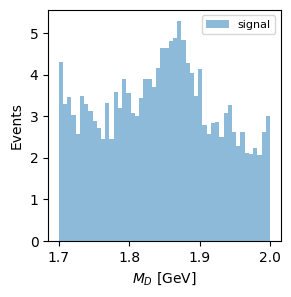

In [48]:
plt.figure(figsize=(3,3))
plt.hist(df2017[df2017["label"]==1]["fMass"], bins=50, range=(1.7,2), label='signal', alpha=0.5, density=True)
#plt.hist(df2017[df2017["label"]==0]["fMass"], bins=50, range=(1.7,2.0), label='background', alpha=0.5, density=True)
plt.ylabel("Events")
plt.xlabel("$M_{D}$ [GeV]")
plt.legend(fontsize=8)
plt.show()

In [50]:
from ROOT import TCanvas, gStyle, TH1F
#hMass = TH1F("hMass", "m(K,#pi)", 60, 1.7, 2.0)

ImportError: dynamic module does not define module export function (PyInit_libPyROOT)